# Backup data used in the paper

In [1]:
import xarray as xr
from s3fs import S3FileSystem, S3Map

In [2]:
def load_scenario(scenario):
    ncfiles = {'wp5':
             [
             '../DATA/ROMS/wp5/t1/file_inst_00010101-00010219.nc',
             '../DATA/ROMS/wp5/t1/file_inst_00010220-00010410.nc',
            '../DATA/ROMS/wp5/t2/file_inst_00010101-00010219.nc',
            '../DATA/ROMS/wp5/t2/file_inst_00010220-00010410.nc',
              #'../DATA/ROMS/wp5/t3/file_inst_00010101-00010219.nc',
              #'../DATA/ROMS/wp5/t3/file_inst_00010220-00010410.nc'
             ],
               'wp6':
             [
             '../DATA/ROMS/wp6/t1/inst_00010101-00010219.nc',
             '../DATA/ROMS/wp6/t1/inst_00010220-00010410.nc',
            '../DATA/ROMS/wp6/t2/inst_00010101-00010219.nc',
            '../DATA/ROMS/wp6/t2/inst_00010220-00010410.nc',
             ],
               'wp75':
             [
             '../DATA/ROMS/wp75/t1/inst_00010101-00010219.nc',
             '../DATA/ROMS/wp75/t1/inst_00010220-00010410.nc',
            '../DATA/ROMS/wp75/t2/inst_00010101-00010219.nc',
            '../DATA/ROMS/wp75/t2/inst_00010220-00010410.nc',
             ],
                'wp8':
             [
             '../DATA/ROMS/wp8/t1/file_inst_00010101-00010219.nc',
             '../DATA/ROMS/wp8/t1/file_inst_00010220-00010410.nc',
            '../DATA/ROMS/wp8/t2/file_inst_00010101-00010219.nc',
            '../DATA/ROMS/wp8/t2/file_inst_00010220-00010410.nc',
              #'../DATA/ROMS/wp8/t3/file_inst_00010101-00010219.nc',
              #'../DATA/ROMS/wp8/t3/file_inst_00010220-00010410.nc'
             ],
               'wp9':
             [
             '../DATA/ROMS/wp9/t1/file_inst_00010101-00010219.nc',
             '../DATA/ROMS/wp9/t1/file_inst_00010220-00010410.nc',
            '../DATA/ROMS/wp9/t2/file_inst_00010101-00010219.nc',
            '../DATA/ROMS/wp9/t2/file_inst_00010220-00010410.nc',
              #'../DATA/ROMS/wp9/t3/file_inst_00010101-00010219.nc',
              #'../DATA/ROMS/wp9/t3/file_inst_00010220-00010410.nc'
             ],
              }
    
    ds0 = xr.open_mfdataset(ncfiles[scenario][0:2])
    ds1 = xr.open_mfdataset(ncfiles[scenario][2:4])
    
    dt1 = ds0['time_instant'][-1]-ds0['time_instant'][0]
    ds1['time_instant'] = ds1['time_instant']+dt1
    ds1['time_counter'] = ds1['time_counter']+dt1

    if len(ncfiles[scenario])>4:
        ds2 = xr.open_mfdataset(ncfiles[scenario][4:6])
        dt2 = ds1['time_instant'][-1]-ds1['time_instant'][0]
        
        ds2['time_instant'] = ds2['time_instant']+dt1+dt2
        ds2['time_counter'] = ds2['time_counter']+dt1+dt2

        return xr.concat([ds0, ds1, ds2], dim='time_counter')

    else:
        return xr.concat([ds0, ds1], dim='time_counter')
        

In [7]:
ds = load_scenario('wp9')
ds = ds.drop_vars(['ssh_y','u_y','w_y','T_y','w_y','rot_y'])
ds

<xarray.Dataset>
Dimensions:              (y_rhoy: 722, x_rhoy: 1, s_rho_slice0: 1, y_uy: 722,
                          x_uy: 1, y_vy: 721, x_vy: 1, time_counter: 9600,
                          axis_nbounds: 2)
Coordinates:
    nav_lat_rhoy         (y_rhoy, x_rhoy) float32 -2e+03 2e+03 ... 2.882e+06
    nav_lon_rhoy         (y_rhoy, x_rhoy) float32 5.1e+05 5.1e+05 ... 5.1e+05
  * s_rho_slice0         (s_rho_slice0) float32 -0.01
    nav_lat_uy           (y_uy, x_uy) float32 -2e+03 2e+03 ... 2.882e+06
    nav_lon_uy           (y_uy, x_uy) float32 5.08e+05 5.08e+05 ... 5.08e+05
    nav_lat_vy           (y_vy, x_vy) float32 0.0 4e+03 ... 2.876e+06 2.88e+06
    nav_lon_vy           (y_vy, x_vy) float32 5.1e+05 5.1e+05 ... 5.1e+05
    time_instant         (time_counter) datetime64[ns] dask.array<chunksize=(2400,), meta=np.ndarray>
  * time_counter         (time_counter) datetime64[ns] 1950-01-01T00:15:00 .....
Dimensions without coordinates: y_rhoy, x_rhoy, y_uy, x_uy, y_vy, x_vy,
                                axis_nbounds
Data variables:
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    v_y                  (time_counter, s_rho_slice0, y_vy, x_vy) float32 dask.array<chunksize=(2400, 1, 721, 1), meta=np.ndarray>
Attributes:
    name:         file_inst
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Sep-26 10:38:00 GMT

In [9]:
scenarios = ['wp5','wp6','wp75','wp8','wp9']
scenario_names = ['KE1','KE2','KE2.5','KE3','KE4']

encoding = {'v_y':{"zlib": True, "complevel": 9}}
for scenario, name in zip(scenarios, scenario_names):
    outfile = f'../DATA/archive/ROMS_turbulent_channel_{name}_v.nc'
    print(outfile)
    ds = load_scenario(scenario)
    ds = ds.drop_vars(['ssh_y','u_y','w_y','T_y','w_y','rot_y'])
    ds.to_netcdf(outfile, encoding=encoding)
    


../DATA/archive/ROMS_turbulent_channel_KE1_v.nc
../DATA/archive/ROMS_turbulent_channel_KE2_v.nc
../DATA/archive/ROMS_turbulent_channel_KE2.5_v.nc
../DATA/archive/ROMS_turbulent_channel_KE3_v.nc
../DATA/archive/ROMS_turbulent_channel_KE4_v.nc


---
# Load the suntans data


In [4]:
s3login = '/home/jupyter-mrayson/s3.acacia.login'

with open(s3login) as f:
    lines = f.readlines()

url, key, secret = [ff.strip('\n') for ff in lines[0:3]]
s3 = S3FileSystem(client_kwargs={'endpoint_url':url},
            key=key,
            secret=secret)


In [5]:
import sfoda.suntans.sunxarray as sxr


In [6]:
f = S3Map("uwaoceanprocesses-suntans/NWS_2km_GLORYS_2013_2014_surface.zarr/", s3=s3)

ds = xr.open_dataset(f, engine='zarr', chunks={})

# These need filling in??
ds.suntans.xv=ds.xv.values
ds.suntans.yv=ds.yv.values

ds = ds.drop_vars(['eta','uc','temp'])
ds

Changing the _FillValue from -999999 to 999999


<xarray.Dataset>
Dimensions:  (Nc: 225368, numsides: 8, Nk: 80, time: 8772, Np: 454016)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-01T00:01:00 ... 2014-07-01
    z_r      (Nk) float64 dask.array<chunksize=(80,), meta=np.ndarray>
Dimensions without coordinates: Nc, numsides, Nk, Np
Data variables:
    cells    (Nc, numsides) int32 dask.array<chunksize=(2000, 8), meta=np.ndarray>
    dv       (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
    dz       (Nk) float64 dask.array<chunksize=(80,), meta=np.ndarray>
    nfaces   (Nc) int32 dask.array<chunksize=(2000,), meta=np.ndarray>
    vc       (time, Nc) float64 dask.array<chunksize=(745, 2000), meta=np.ndarray>
    xp       (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    xv       (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
    yp       (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    yv       (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
Attributes:
    Author:       mrayson
    Description:  SUNTANS surface fields

In [7]:
encoding = {'vc':{"zlib": True, "complevel": 4,'dtype':'float32', 'least_significant_digit':4}}
# save month by month
months = [7,8,9,10,11,12,1,2,3,4,5,6]
year = 2013

for mo in months:
    if mo == 1:
        year = 2014
    outfile = f'../DATA/archive/SUNTANS_IndoAusBasin_{year}{mo:02d}_surface_v.nc'
    print(outfile)
    myds = ds.sel(time=ds.time.dt.month.isin([mo]))
    myds.to_netcdf(outfile, encoding=encoding)


../DATA/archive/SUNTANS_IndoAusBasin_201307_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201308_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201309_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201310_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201311_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201312_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201401_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201402_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201403_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201405_surface_v.nc
../DATA/archive/SUNTANS_IndoAusBasin_201406_surface_v.nc


In [8]:
#dstest = ds.isel(time=slice(0,100))
# Save the whole lot
outfile = f'../DATA/archive/SUNTANS_IndoAusBasin_20132014_surface_v.nc'

encoding = {'vc':{"zlib": True, "complevel": 4,'dtype':'float32', 'least_significant_digit':4}}

ds.to_netcdf(outfile, encoding=encoding)


In [11]:
dsnew = xr.open_dataset(outfile)
dsnew

<xarray.Dataset>
Dimensions:  (Nc: 225368, numsides: 8, Nk: 80, time: 100, Np: 454016)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-01T00:01:00 ... 2013-07-05T03:00:00
    z_r      (Nk) float64 ...
Dimensions without coordinates: Nc, numsides, Nk, Np
Data variables:
    cells    (Nc, numsides) int32 ...
    dv       (Nc) float64 ...
    dz       (Nk) float64 ...
    nfaces   (Nc) int32 ...
    vc       (time, Nc) float32 ...
    xp       (Np) float64 ...
    xv       (Nc) float64 ...
    yp       (Np) float64 ...
    yv       (Nc) float64 ...
Attributes:
    Author:       mrayson
    Description:  SUNTANS surface fields

(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7f9920ff7730>)

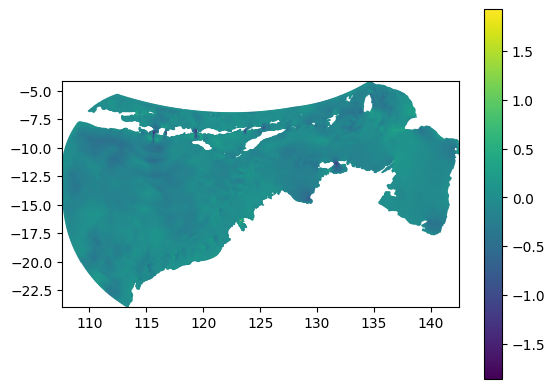

In [12]:
#dsnew.suntans.plotcelldata(dsnew['vc'].isel(time=90))